IMPORT

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

READ DATASET

In [4]:
df = pd.read_csv(
    "Impact_of_Remote_Work_on_Mental_Health.csv",
    usecols=['Hours_Worked_Per_Week', 'Work_Life_Balance_Rating', 'Stress_Level', 'Sleep_Quality', 'Mental_Health_Condition']
)

encoderSL = LabelEncoder()
encoderSQ = LabelEncoder()
encoderMHC = LabelEncoder()

sleep_quality_map = {
    'Poor': 1,
    'Average': 2,
    'Good': 3,
}

stress_level_map = {
    'Low': 1,
    'Medium': 2,   # If both used
    'High': 3
}

df['Stress_Level_Ranked'] = df['Stress_Level'].map(stress_level_map)
df['Sleep_Quality_Ranked'] = df['Sleep_Quality'].map(sleep_quality_map)

df['Mental_Health_Condition_Encoded'] = encoderMHC.fit_transform(df['Mental_Health_Condition'])

df

,Hours_Worked_Per_Week,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Sleep_Quality,Stress_Level_Ranked,Sleep_Quality_Ranked,Mental_Health_Condition_Encoded
0,47,2,Medium,Depression,Good,2,3,2
1,52,1,Medium,Anxiety,Good,2,3,0
2,46,5,Medium,Anxiety,Poor,2,1,0
3,32,4,High,Depression,Poor,3,1,2
4,35,2,High,NaN,Average,3,2,3
...,...,...,...,...,...,...,...,...
4995,24,5,High,Burnout,Average,3,2,1
4996,48,1,Low,Depression,Average,1,2,2
4997,34,4,High,Burnout,Poor,3,1,1
4998,58,5,Low,NaN,Average,1,2,3


DESCRIPTIVE ANALYSIS

In [5]:
df.info()
df.describe(include='all')

df['Mental_Health_Condition'].value_counts()
df['Sleep_Quality'].value_counts(normalize=True) * 100  # percentage

df.groupby('Mental_Health_Condition')['Hours_Worked_Per_Week'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Hours_Worked_Per_Week            5000 non-null   int64 
 1   Work_Life_Balance_Rating         5000 non-null   int64 
 2   Stress_Level                     5000 non-null   object
 3   Mental_Health_Condition          3804 non-null   object
 4   Sleep_Quality                    5000 non-null   object
 5   Stress_Level_Ranked              5000 non-null   int64 
 6   Sleep_Quality_Ranked             5000 non-null   int64 
 7   Mental_Health_Condition_Encoded  5000 non-null   int32 
dtypes: int32(1), int64(4), object(3)
memory usage: 293.1+ KB


Mental_Health_Condition
Anxiety       39.407668
Burnout       40.031250
Depression    39.629213
Name: Hours_Worked_Per_Week, dtype: float64

IDENTIFYING MISSING VALUE

In [6]:
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].fillna('Good')
df.isnull().sum()

Hours_Worked_Per_Week              0
Work_Life_Balance_Rating           0
Stress_Level                       0
Mental_Health_Condition            0
Sleep_Quality                      0
Stress_Level_Ranked                0
Sleep_Quality_Ranked               0
Mental_Health_Condition_Encoded    0
dtype: int64

In [7]:
df.dropna()

for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [ ]:
df['Mental_State'] = df['Mental_Health_Condition'].replace({
    'Burnout': 'Burnout',
    'Anxiety': 'Burnout',
    'Depression': 'Burnout',
    'None': 'Good'
})

encoderMS = LabelEncoder()
df['Mental_State_Encoded'] = encoderMS.fit_transform(df['Mental_State'])

X = df[['Hours_Worked_Per_Week', 'Work_Life_Balance_Rating', 'Sleep_Quality_Ranked', 'Stress_Level_Ranked']]
y = df['Mental_State_Encoded']


ALGORITHM: LOGISTIC REGRESSION

Accuracy: 0.48325


,Hours_Worked_Per_Week,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Sleep_Quality,Stress_Level_Ranked,Sleep_Quality_Ranked,Mental_Health_Condition_Encoded,Mental_State,Mental_State_Encoded
0,47,2,Medium,Depression,Good,2,3,2,Burnout,0
1,52,1,Medium,Anxiety,Good,2,3,0,Burnout,0
2,46,5,Medium,Anxiety,Poor,2,1,0,Burnout,0
3,32,4,High,Depression,Poor,3,1,2,Burnout,0
4,35,2,High,Good,Average,3,2,3,Good,1
...,...,...,...,...,...,...,...,...,...,...
4995,24,5,High,Burnout,Average,3,2,1,Burnout,0
4996,48,1,Low,Depression,Average,1,2,2,Burnout,0
4997,34,4,High,Burnout,Poor,3,1,1,Burnout,0
4998,58,5,Low,Good,Average,1,2,3,Good,1


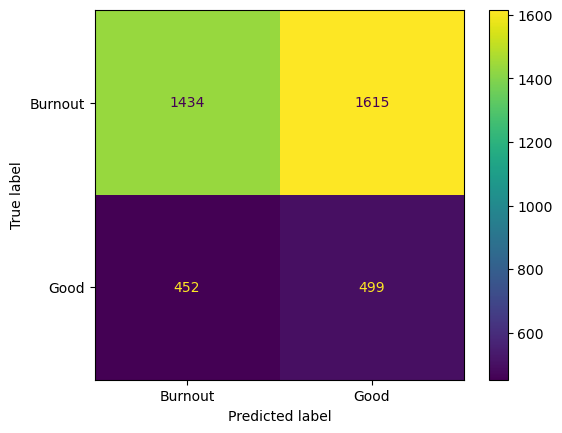

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=df['Mental_State'].unique())
print("Accuracy:", accuracy_score(y_test, y_pred))

ALGORITHM: RANDOM FOREST

Accuracy: 0.652


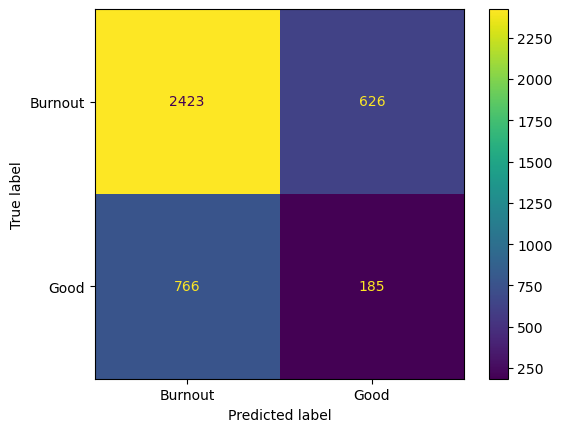

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, display_labels=df['Mental_State'].unique())
print("Accuracy:", accuracy_score(y_test, rf_y_pred))

In [12]:
X_test

user_input = pd.DataFrame([{
    'Hours_Worked_Per_Week': 71,
    'Work_Life_Balance_Rating': 1,
    'Sleep_Quality_Ranked': 2,
    'Stress_Level_Ranked': 3
}])

test = rf_model.predict(user_input)[0]
if test == 1:
    print('good')
else:
    print('burnout')

burnout
